# 📘 Combined Evaluation of Spam Classifiers - Final Report

# 1. Introduction

This notebook compares four spam classification models from two training paths.
We analyze their generalization performance on both internal and external datasets to determine the most robust model for real-world deployment.

Models:
- NB-1 and SVM-1 (trained on a small dataset)
- NB-2 and SVM-2 (trained on a large dataset)

Datasets:
- Small  Dataset
- Large Dataset
- General  Dataset



# 2. Load Required Libraries and Setup

In [1]:
# Import necessary libraries for data handling, model evaluation, and plotting
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score, f1_score, recall_score


 # 3. Load Models and Vectorizers

In [2]:
# Load trained models and their corresponding TF-IDF vectorizers for both paths

# Models trained on Path 1 (clean, small dataset)
nb1 = joblib.load("nb1_model.pkl")
svm1 = joblib.load("svm1_model.pkl")
vectorizer1 = joblib.load("tfidf_vectorizer_path1.pkl")

# Models trained on Path 2 (large, diverse dataset)
nb2 = joblib.load("nb2_model.pkl")
svm2 = joblib.load("svm2_model.pkl")
vectorizer2 = joblib.load("tfidf_vectorizer_path2.pkl")


# 4. Load and Prepare the General Dataset

In [3]:
# Load the preprocessed "General" dataset used for external evaluation
df_general_clean = joblib.load("df_general_clean.pkl")

# Since both Path 1 and Path 2 used the same preprocessing steps,
# we can apply both vectorizers to the same cleaned messages

# Transform the general dataset using the Path 1 TF-IDF vectorizer
X_general_1 = vectorizer1.transform(df_general_clean["clean_message"])

# Transform the general dataset using the Path 2 TF-IDF vectorizer
X_general_2 = vectorizer2.transform(df_general_clean["clean_message"])

# Extract the true labels for evaluation
y_general = df_general_clean["label_num"]


# 5. Evaluate All Four Models on General Dataset

In [4]:
# Define evaluation function that returns accuracy, F1 score, and recall
def evaluate(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred), f1_score(y, y_pred), recall_score(y, y_pred)

# Initialize result dictionary to store metrics for all 4 models
results = {
    "Model": ["NB-1 (Path 1)", "SVM-1 (Path 1)", "NB-2 (Path 2)", "SVM-2 (Path 2)"],
    "Accuracy": [],
    "F1 Score": [],
    "Recall": []
}

# Evaluate Path 1 models using X_general_1
for model in [nb1, svm1]:
    acc, f1, recall = evaluate(model, X_general_1, y_general)
    results["Accuracy"].append(acc)
    results["F1 Score"].append(f1)
    results["Recall"].append(recall)

# Evaluate Path 2 models using X_general_2
for model in [nb2, svm2]:
    acc, f1, recall = evaluate(model, X_general_2, y_general)
    results["Accuracy"].append(acc)
    results["F1 Score"].append(f1)
    results["Recall"].append(recall)

# Convert results to DataFrame for display
df_results = pd.DataFrame(results)
display(df_results)


,Model,Accuracy,F1 Score,Recall
0,NB-1 (Path 1),0.871080,0.847423,0.735242
1,SVM-1 (Path 1),0.900697,0.887795,0.806798
2,NB-2 (Path 2),0.888502,0.874510,0.797853
3,SVM-2 (Path 2),0.909408,0.900000,0.837209


 # 6. Visualize Results on General Dataset

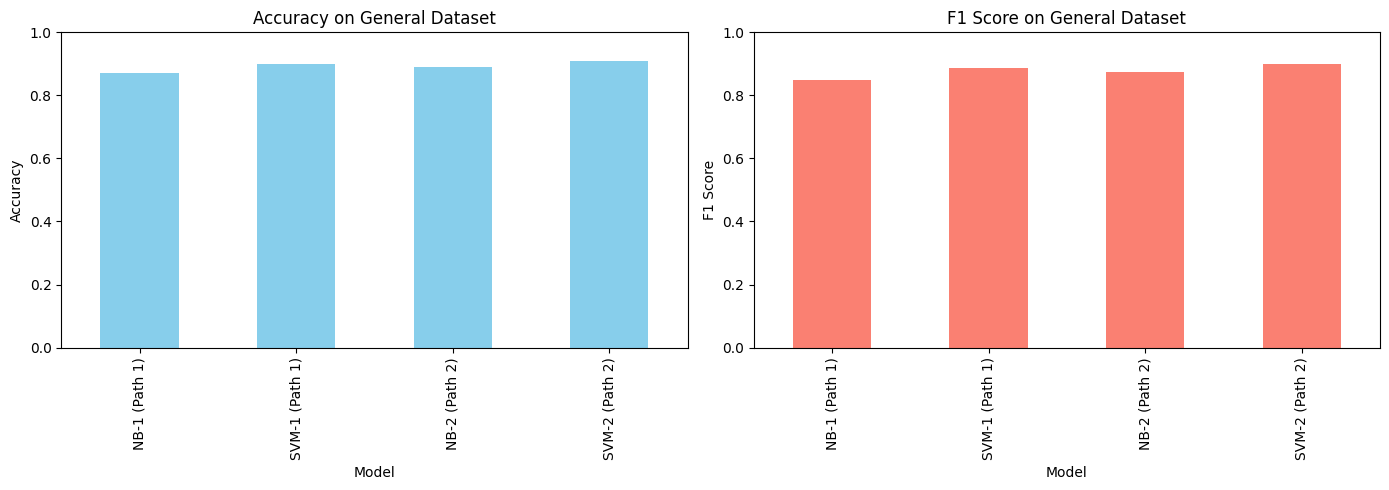

In [5]:
# Create side-by-side bar plots for Accuracy and F1 Score

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy bar chart
df_results.plot(x="Model", y="Accuracy", kind="bar", ax=axes[0], color="skyblue", legend=False)
axes[0].set_title("Accuracy on General Dataset")
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("Accuracy")

# F1 Score bar chart
df_results.plot(x="Model", y="F1 Score", kind="bar", ax=axes[1], color="salmon", legend=False)
axes[1].set_title("F1 Score on General Dataset")
axes[1].set_ylim(0, 1)
axes[1].set_ylabel("F1 Score")

plt.tight_layout()
plt.show()


 # 7. Load Internal + External Results from Path 1 and 2


In [6]:
# Load internal + unseen evaluation results for each path
results_path1 = pd.read_csv("results_path1.csv")  # Path 1: Validation, Test, Large Unseen, General Dataset
results_path2 = pd.read_csv("results_path2.csv")  # Path 2: Validation, Test, Small Unseen, General Dataset

# Display for quick inspection
display(results_path1)
display(results_path2)


,Dataset,NB-1 Accuracy,SVM-1 Accuracy,NB-1 F1,SVM-1 F1
0,Validation Set,0.965161,0.976774,0.840237,0.903226
1,Test Set,0.978093,0.989691,0.905028,0.957895
2,Large Dataset,0.722418,0.460522,0.336842,0.340728
3,General Dataset,0.871080,0.900697,0.847423,0.887795


,Dataset,NB-2 Accuracy,SVM-2 Accuracy,NB-2 F1,SVM-2 F1
0,Validation Set,0.939080,0.949449,0.855385,0.878125
1,Test Set,0.930052,0.951425,0.833846,0.887556
2,Small Dataset,0.953237,0.971223,0.939815,0.963964
3,General Dataset,0.888502,0.909408,0.874510,0.900000


#  8. Comparing F1 Scores of Four Models Across Different Datasets


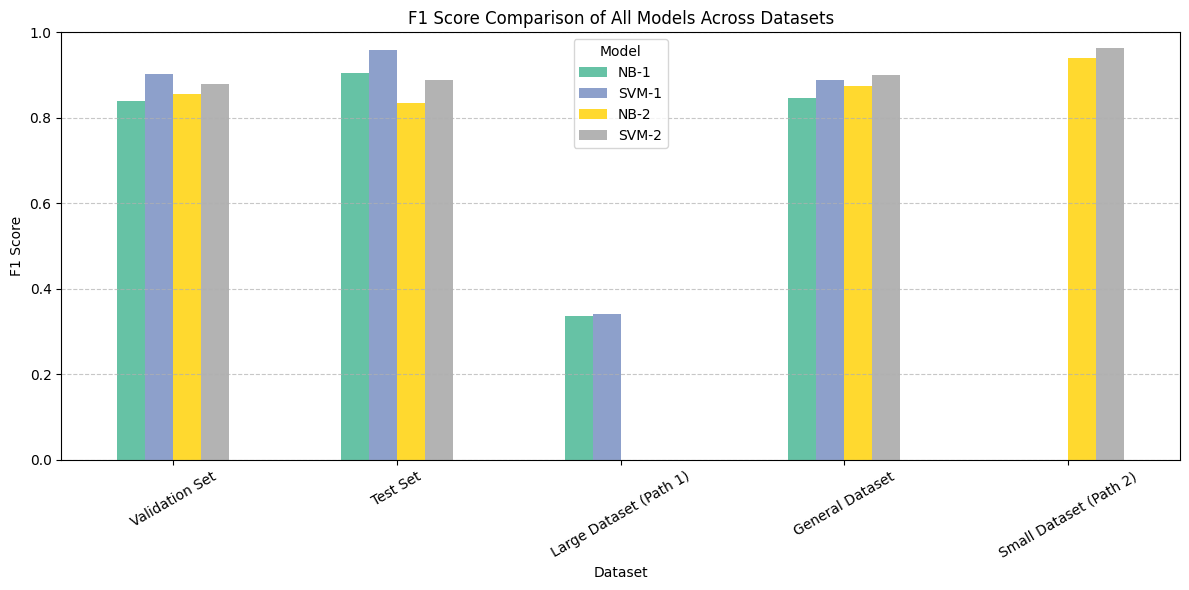

In [7]:
#results_path1 -> Validation, Test, Large, General
#results_path2 -> Validation, Test, Small, General

# Initialize dictionary for combined F1 scores
all_datasets = [
    "Validation Set",
    "Test Set",
    "Large Dataset (Path 1)",
    "General Dataset",
    "Small Dataset (Path 2)"
]

f1_data = {
    "Dataset": all_datasets,
    "NB-1": [],
    "SVM-1": [],
    "NB-2": [],
    "SVM-2": []
}

# Helper function to get F1 by dataset from a dataframe
def get_f1(df, dataset_name, col):
    match = df[df["Dataset"] == dataset_name]
    return match[col].values[0] if not match.empty else None

# Fill in values
for ds in all_datasets:
    # Remove path label for matching original dataset names
    base_name = ds.replace(" (Path 1)", "").replace(" (Path 2)", "")

    f1_data["NB-1"].append(get_f1(results_path1, base_name, "NB-1 F1"))
    f1_data["SVM-1"].append(get_f1(results_path1, base_name, "SVM-1 F1"))
    f1_data["NB-2"].append(get_f1(results_path2, base_name, "NB-2 F1"))
    f1_data["SVM-2"].append(get_f1(results_path2, base_name, "SVM-2 F1"))

# Create DataFrame for plotting
df_f1 = pd.DataFrame(f1_data)
df_f1.set_index("Dataset", inplace=True)

# Plot
df_f1.plot(kind="bar", figsize=(12, 6), colormap="Set2")

plt.title("F1 Score Comparison of All Models Across Datasets")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.legend(title="Model")
plt.show()


#9. Final Analysis

We tested four models (NB-1, SVM-1 from Path 1 and NB-2, SVM-2 from Path 2) across different datasets.

Models from Path 1 performed well on validation/test sets but failed to generalize on large unseen data.

In contrast, Path 2 models, trained on more data, showed stronger and more consistent performance, especially SVM-2, which had the highest F1 scores overall.

This shows that larger training data and SVM give better generalization for spam detection.

Recall is especially important in spam detection because it measures how many actual spam messages the model correctly identifies. **SVM-2**  had the highest recall on General Dataset ( Dataset 3), meaning it caught more spam messages with fewer missed cases, which is critical to reduce false negatives in real-world applications.

**Best Balanced Choice for Deployment**: **SVM-2**



